In [2]:
ORS_API_KEY = '5b3ce3597851110001cf624894d872a97a6d4ec7bc1f8b0ebc1db70b'

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# Which city do you want to map neighborhoods in?
# Edit the my_lat and my_long point variables below.
# This program will analyze 64 points
# ...over a square of 0.007 degrees latitude to the north and 0.007 degrees longtude to the west/east depending on sign

In [5]:
my_lat = 37.84
my_long = -101.407

In [6]:
# PART ONE: CREATE THE POINTS DATAFRAME

In [7]:
# Get Lat and Long into Dataframe

In [8]:
row_names = ("AA",
         "AB",
         "AC",
         "AD",
         "AE",
         "AF",
         "AG",
         "BA",
         "BB",
         "BC",
         "BD",
         "BE",
         "BF",
         "BG",
         "CA",
         "CB",
         "CC",
         "CD",
         "CE",
         "CF",
         "CG",
         "DA",
         "DB",
         "DC",
         "DD",
         "DE",
         "DF",
         "DG",
         "EA",
         "EB",
         "EC",
         "ED",
         "EE",
         "EF",
         "EG",
         "FA",
         "FB",
         "FC",
         "FD",
         "FE",
         "FF",
         "FG",
         "GA",
         "GB",
         "GC",
         "GD",
         "GE",
         "GF",
         "GG",
         "HA",
         "HB",
         "HC",
         "HD",
         "HE",
         "HF",
         "HG",)

In [9]:
Latitude = (my_lat,
         my_lat,
         my_lat,
         my_lat,
         my_lat,
         my_lat,
         my_lat,
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.001),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.002),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.003),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.004),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.005),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.006),
         (my_lat+0.007),
         (my_lat+0.007),
         (my_lat+0.007),
         (my_lat+0.007),
         (my_lat+0.007),
         (my_lat+0.007),
         (my_lat+0.007),)

In [10]:
Longitude = (my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),
         my_long,
         (my_long+0.001),
         (my_long+0.002),
         (my_long+0.003),
         (my_long+0.004),
         (my_long+0.005),
         (my_long+0.006),)

In [11]:
data = pd.DataFrame(
    {'row_names': row_names,
     'Latitude': Latitude,
     'Longitude': Longitude
    })

In [12]:
data.head()

,row_names,Latitude,Longitude
0,AA,37.84,-101.407
1,AB,37.84,-101.406
2,AC,37.84,-101.405
3,AD,37.84,-101.404
4,AE,37.84,-101.403


In [13]:
# PART TWO: GET THE DISTANCE MATRIX FROM OPENROUTESERVICE

In [14]:
# Pull Lat and Long Coords into List

In [15]:
locations = list(zip(data.Longitude, data.Latitude))

In [16]:
print(locations)
type(locations)
len(locations)

[(-101.407, 37.84), (-101.40599999999999, 37.84), (-101.405, 37.84), (-101.404, 37.84), (-101.40299999999999, 37.84), (-101.402, 37.84), (-101.401, 37.84), (-101.407, 37.841), (-101.40599999999999, 37.841), (-101.405, 37.841), (-101.404, 37.841), (-101.40299999999999, 37.841), (-101.402, 37.841), (-101.401, 37.841), (-101.407, 37.842000000000006), (-101.40599999999999, 37.842000000000006), (-101.405, 37.842000000000006), (-101.404, 37.842000000000006), (-101.40299999999999, 37.842000000000006), (-101.402, 37.842000000000006), (-101.401, 37.842000000000006), (-101.407, 37.843), (-101.40599999999999, 37.843), (-101.405, 37.843), (-101.404, 37.843), (-101.40299999999999, 37.843), (-101.402, 37.843), (-101.401, 37.843), (-101.407, 37.844), (-101.40599999999999, 37.844), (-101.405, 37.844), (-101.404, 37.844), (-101.40299999999999, 37.844), (-101.402, 37.844), (-101.401, 37.844), (-101.407, 37.845000000000006), (-101.40599999999999, 37.845000000000006), (-101.405, 37.845000000000006), (-101

56

In [17]:
# Calling the API
## Tutorial for using the API from https://www.youtube.com/watch?v=XNHU9vxGiJw

In [18]:
# Old
body = {'locations': locations,
       'metrics': ['distance']}

headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': ORS_API_KEY,
    'Content-Type': 'application/json; chrset=utf-8'
}

response = requests.post('https://api.openrouteservice.org/v2/matrix/foot-walking', json=body, headers=headers)

In [19]:
distances = response.json()['distances']
distances

[[0.0,
  18.73,
  163.33,
  192.49,
  519.41,
  520.95,
  520.95,
  149.5,
  185.42,
  482.75,
  508.18,
  520.95,
  520.95,
  520.95,
  227.81,
  458.42,
  496.96,
  520.95,
  520.95,
  540.21,
  540.21,
  434.09,
  485.73,
  520.95,
  520.95,
  540.21,
  717.55,
  769.25,
  484.69,
  520.95,
  540.21,
  550.53,
  724.98,
  769.25,
  769.25,
  523.46,
  559.89,
  652.47,
  732.41,
  769.25,
  794.23,
  794.74,
  611.59,
  670.35,
  739.84,
  774.34,
  795.37,
  811.8,
  811.8,
  681.3,
  747.26,
  804.09,
  823.85,
  850.2,
  1017.3,
  1032.93],
 [18.73,
  0.0,
  144.6,
  173.76,
  500.67,
  502.21,
  502.21,
  130.76,
  166.68,
  464.02,
  489.45,
  502.21,
  502.21,
  502.21,
  209.08,
  439.69,
  478.22,
  502.21,
  502.21,
  521.48,
  521.48,
  415.36,
  467.0,
  502.21,
  502.21,
  521.48,
  698.82,
  750.52,
  465.96,
  502.21,
  521.48,
  531.79,
  706.25,
  750.52,
  750.52,
  504.73,
  541.16,
  633.73,
  713.67,
  750.52,
  775.49,
  776.0,
  592.86,
  651.62,
  721.1,
  755

In [20]:
# PART THREE: NETWORKX SETUP

In [21]:
# Assigning Nodes and Edges for NetworkX

In [22]:
G = nx.Graph()

r = range(data.shape[0])

for i in r:
    G.add_node(i)
    print("node created for location", i)

node created for location 0
node created for location 1
node created for location 2
node created for location 3
node created for location 4
node created for location 5
node created for location 6
node created for location 7
node created for location 8
node created for location 9
node created for location 10
node created for location 11
node created for location 12
node created for location 13
node created for location 14
node created for location 15
node created for location 16
node created for location 17
node created for location 18
node created for location 19
node created for location 20
node created for location 21
node created for location 22
node created for location 23
node created for location 24
node created for location 25
node created for location 26
node created for location 27
node created for location 28
node created for location 29
node created for location 30
node created for location 31
node created for location 32
node created for location 33
node created for locatio

In [35]:
# This cell is for use in the "trimming edges for algorithms" section

first_node = list()
second_node = list()
distance = list()

for i in r:
    for p in r:
        #print(i,p,distances[i][p])
        first_node.append(i)
        second_node.append(p)
        distance.append(distances[i][p])

edge_data = pd.DataFrame(
    {'first_node': first_node,
     'second_node': second_node,
     'distance': distance
    })

len(distance)

3136

In [24]:
for i in r:
    for p in r:
        if distances[i][p] == 0:
            print("self-referential, no node created")
        else:
            G.add_edge(i,p, length = (distances[i][p]))
            print("edge created from", i, "to", p, "of length", distances[i][p])

self-referential, no node created
edge created from 0 to 1 of length 18.73
edge created from 0 to 2 of length 163.33
edge created from 0 to 3 of length 192.49
edge created from 0 to 4 of length 519.41
edge created from 0 to 5 of length 520.95
edge created from 0 to 6 of length 520.95
edge created from 0 to 7 of length 149.5
edge created from 0 to 8 of length 185.42
edge created from 0 to 9 of length 482.75
edge created from 0 to 10 of length 508.18
edge created from 0 to 11 of length 520.95
edge created from 0 to 12 of length 520.95
edge created from 0 to 13 of length 520.95
edge created from 0 to 14 of length 227.81
edge created from 0 to 15 of length 458.42
edge created from 0 to 16 of length 496.96
edge created from 0 to 17 of length 520.95
edge created from 0 to 18 of length 520.95
edge created from 0 to 19 of length 540.21
edge created from 0 to 20 of length 540.21
edge created from 0 to 21 of length 434.09
edge created from 0 to 22 of length 485.73
edge created from 0 to 23 of le

In [25]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (2, 3), (2, 4), (2, 5), (2

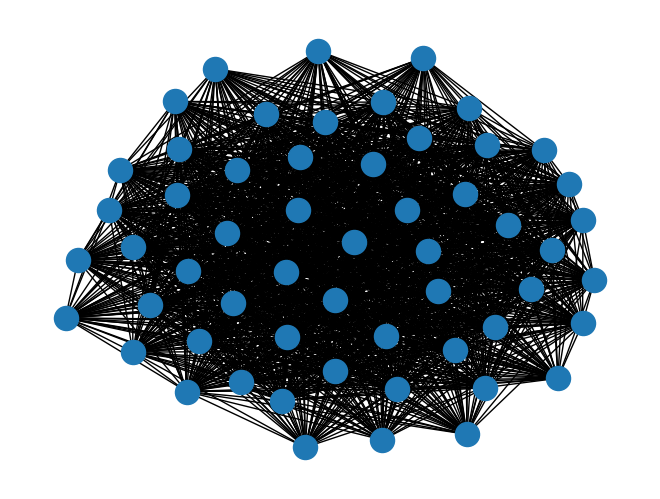

In [26]:
nx.draw(G)

In [27]:
# PART FOUR: TRIMMING EDGES FOR ALGORITHMS

In [44]:
edge_data.sort_values('distance')
indexDistance = edge_data[ (edge_data['distance'] != 0.00) & (edge_data['distance'] >= 30) ].index
edge_data.drop(indexDistance , inplace=True)
edge_data = edge_data.drop(edge_data[edge_data['distance'] == 0].index)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(edge_data)

      first_node  second_node  distance
1              0            1     18.73
56             1            0     18.73
115            2            3     29.16
119            2            7     13.84
120            2            8     22.08
170            3            2     29.16
176            3            8      7.08
229            4            5      1.54
230            4            6      1.54
234            4           10     11.23
235            4           11      1.54
236            4           12      1.54
237            4           13      1.54
240            4           16     22.45
241            4           17      1.54
242            4           18      1.54
243            4           19     20.80
244            4           20     20.80
247            4           23      1.54
248            4           24      1.54
249            4           25     20.80
253            4           29      1.54
254            4           30     20.80
259            4           35      4.05


In [81]:
# now we will create a new graph "N" with less edges to analyze easier

In [47]:
N = nx.Graph()

r = range(data.shape[0])

for i in r:
    N.add_node(i)
    print("node created for location", i)

node created for location 0
node created for location 1
node created for location 2
node created for location 3
node created for location 4
node created for location 5
node created for location 6
node created for location 7
node created for location 8
node created for location 9
node created for location 10
node created for location 11
node created for location 12
node created for location 13
node created for location 14
node created for location 15
node created for location 16
node created for location 17
node created for location 18
node created for location 19
node created for location 20
node created for location 21
node created for location 22
node created for location 23
node created for location 24
node created for location 25
node created for location 26
node created for location 27
node created for location 28
node created for location 29
node created for location 30
node created for location 31
node created for location 32
node created for location 33
node created for locatio

In [48]:
keep_first_node = edge_data['first_node'].tolist()
keep_second_node = edge_data['first_node'].tolist()
#print(keep_first_node)
#print(keep_second_node)

for i in keep_first_node:
    N.add_edge(keep_first_node[i],keep_second_node[i])

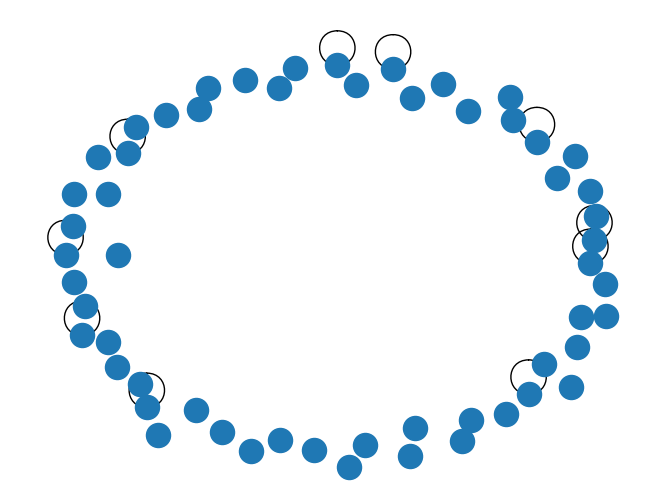

In [49]:
nx.draw(N)

In [26]:
# PART FOUR: IDENTIFYING NEIGHBORHOODS WITH A COMMUNITY ALGORITHM

In [27]:
# Youtube tutorial: https://www.youtube.com/watch?v=F4RVBAGJcFY

In [52]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
k = 2

comp = nx.community.girvan_newman(N)

for communities in itertools.islice(comp, k):

    print(tuple(sorted(c) for c in communities))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [55])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], [55])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53], [54], [55])
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], [53], [54], [55])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [55])

In [31]:
# PART FIVE: PLOTTING MAPS